In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tqdm.autonotebook import tqdm
import warnings
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
    




In [8]:
df = pd.read_csv("./spambase.data")
y = df.iloc[:,-1:]
x = df.iloc[:,:57]

df.describe()


,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,...,0.40,0.41,0.42,0.778,0.43,0.44,3.756,61,278,1
count,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,...,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,0.104576,0.212922,0.280578,0.065439,0.312222,0.095922,0.114233,0.105317,0.090087,0.239465,...,0.038583,0.139061,0.016980,0.268960,0.075827,0.044248,5.191827,52.170870,283.290435,0.393913
std,0.305387,1.290700,0.504170,1.395303,0.672586,0.273850,0.391480,0.401112,0.278643,0.644816,...,0.243497,0.270377,0.109406,0.815726,0.245906,0.429388,31.732891,194.912453,606.413764,0.488669
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.275500,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.382500,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.314250,0.052000,0.000000,3.705250,43.000000,265.250000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


In [9]:
x = StandardScaler().fit_transform(x)


x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)
C_values_for_fitting = [0.00005, 0.0005, 0.005, 0.05, 0.5, 5, 50, 500, 5000, 50000]
Linear_test , Quadratic_test , RBF_test = [] , [] , []
kernals = ['linear', 'poly', 'rbf']


warnings.filterwarnings('ignore')
FinalTable = pd.DataFrame(columns=['C', 'Linear', 'Quadratic', 'RBF'])

In [10]:
for C_ in tqdm(C_values_for_fitting, leave=False, position=0):
    
    
    accuracies = []
    test_list = []
    
    
    for ker in tqdm(kernals, leave=False, position=0):
        
        if(ker == "poly"):
            classifier = SVC(C=C_, kernel=ker ,degree = 2 , max_iter=1e6)
        else:
            classifier = SVC(C=C_, kernel=ker, max_iter=1e6)
        classifier.fit(x_train, y_train)
        accuracy_train,accuracy_test = accuracy_score(y_train, classifier.predict(x_train)),accuracy_score(y_test, classifier.predict(x_test))
        accuracies.append((accuracy_train,accuracy_test))
        test_list.append(accuracy_test)
        
    Linear_test.append(test_list[0])
    Quadratic_test.append(test_list[1])
    RBF_test.append(test_list[2])
    

    FinalTable = FinalTable.append({'C': C_, 'Linear': accuracies[0], 'Quadratic': accuracies[1], 'RBF': accuracies[2]}, ignore_index=True)


In [11]:
FinalTable

,C,Linear,Quadratic,RBF
0,0.00005,"(0.6046583850931677, 0.6398550724637682)","(0.5944099378881987, 0.6333333333333333)","(0.5944099378881987, 0.6333333333333333)"
1,0.00050,"(0.8574534161490683, 0.8753623188405797)","(0.59472049689441, 0.6340579710144928)","(0.5944099378881987, 0.6333333333333333)"
2,0.00500,"(0.9114906832298136, 0.9268115942028986)","(0.6046583850931677, 0.6391304347826087)","(0.5944099378881987, 0.6333333333333333)"
3,0.05000,"(0.9307453416149069, 0.9355072463768116)","(0.6900621118012422, 0.7159420289855073)","(0.8950310559006212, 0.9130434782608695)"
4,0.50000,"(0.9322981366459627, 0.9369565217391305)","(0.8220496894409938, 0.8289855072463768)","(0.937888198757764, 0.9340579710144927)"
5,5.00000,"(0.9332298136645962, 0.9347826086956522)","(0.9322981366459627, 0.9188405797101449)","(0.9580745341614907, 0.9427536231884058)"
6,50.00000,"(0.9304347826086956, 0.9326086956521739)","(0.9658385093167702, 0.9217391304347826)","(0.9816770186335404, 0.9449275362318841)"
7,500.00000,"(0.8204968944099379, 0.813768115942029)","(0.9819875776397515, 0.9181159420289855)","(0.9922360248447205, 0.9333333333333333)"
8,5000.00000,"(0.6267080745341614, 0.6086956521739131)","(0.991304347826087, 0.8985507246376812)","(0.9940993788819876, 0.9239130434782609)"
9,50000.00000,"(0.6080745341614907, 0.5978260869565217)","(0.993167701863354, 0.8920289855072464)","(0.9962732919254659, 0.9057971014492754)"


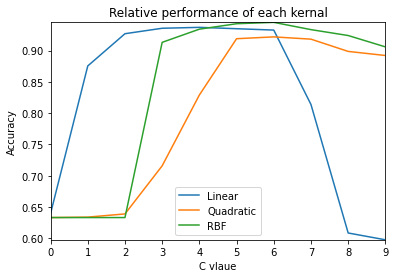

In [12]:
p = [*range(0,10,1)]
plt.plot(p, Linear_test, label = "Linear")
plt.plot(p, Quadratic_test, label = "Quadratic")
plt.plot(p, RBF_test, label = "RBF")

plt.xlabel("C vlaue")
plt.ylabel("Accuracy")
plt.title("Relative performance of each kernal")
# plt.ylim(0 , 1)
plt.margins(0)
plt.legend()
plt.show()